In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_21533/424189378.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
data = iris.drop('species', axis = 1)
labels = iris['species']

In [12]:
data = torch.tensor(data.values).float()

In [14]:
data.shape

torch.Size([150, 4])

In [15]:
labels = torch.zeros(len(data), dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [16]:
labels.shape

torch.Size([150])

In [19]:
# Create a class for the model

class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()
    
        # create a dictionary to store the layers
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers 
        
        # input layer
        self.layers['input'] = nn.Linear(4, nUnits)
        
        # hidden layers
        for i in range(nLayers):
            self.layers[f'hidden {i}'] = nn.Linear(nUnits, nUnits)
            
        # output layer
        self.layers['output'] = nn.Linear(nUnits, 3)
    
    # forward pass
    
    def forward(self, x):
        # input layer
        x = self.layers['input'](x)
        
        # hidden layers
        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden {i}'](x))
        
        # output layer
        x = self.layers['output'](x)
        return x

In [20]:
nUnits = 12
nLayers = 4
net = ANNiris(12, 4)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden 0): Linear(in_features=12, out_features=12, bias=True)
    (hidden 1): Linear(in_features=12, out_features=12, bias=True)
    (hidden 2): Linear(in_features=12, out_features=12, bias=True)
    (hidden 3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [57]:
# testing
tmpx = torch.randn(91, 4)
y = net(tmpx)
print(y.shape), print(' ')
print(y)

torch.Size([91, 3])
 
tensor([[ -7.2861,   1.3494,   5.9080],
        [ -1.1493,   2.5378,  -1.6189],
        [ -2.2623,   2.1093,  -0.0374],
        [ -4.7265,   1.2214,   3.4313],
        [ -7.2694,   1.3564,   5.8829],
        [  8.5722,   1.1602, -10.1451],
        [ -1.7686,   3.5797,  -2.1351],
        [-10.1351,   1.5942,   8.5398],
        [ -1.2376,   3.1896,  -2.2538],
        [  7.9488,   1.3482,  -9.7144],
        [ -5.0909,   1.2607,   3.7631],
        [ -8.7974,   1.4719,   7.3127],
        [  3.1438,   2.2101,  -5.6921],
        [  8.4344,   0.8912,  -9.6974],
        [  4.1957,   1.9986,  -6.5468],
        [  6.7056,   1.2464,  -8.3138],
        [  2.8272,   1.9675,  -5.0948],
        [ -4.9810,   1.2474,   3.6657],
        [ -7.6015,   1.3760,   6.2021],
        [  4.0727,   1.3645,  -5.7125],
        [  7.6130,   1.0689,  -9.0511],
        [ -1.8009,   1.7947,  -0.1484],
        [  7.5615,   1.7852,  -9.8037],
        [ -0.9586,   2.6096,  -1.8912],
        [  3.4154,

In [59]:
# train the model

def trainModel(model):
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    losses = torch.zeros(numepochs)
    
    for epochi in range(numepochs):
        yHat = model(data)
        
        loss = lossfun(yHat, labels)
        losses[epochi] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = model(data)
    predlabels = torch.argmax(predictions, axis = 1)
    acc = 100*torch.mean((predlabels == labels).float())
    
    nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return acc, nParams

In [62]:
numepochs = 500
acc, nParams = trainModel(ANNiris(16, 3))
print(acc, nParams)

tensor(98.6667) 947


In [33]:
# define the model parameters
numlayers = range(1,6)         # number of hidden layers
numunits  = np.arange(4,101,3) # units per hidden layer

# initialize output matrices
accuracies  = np.zeros((len(numunits),len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

# number of training epochs
numepochs = 500


# start the experiment!
for unitidx in range(len(numunits)):
      for layeridx in range(len(numlayers)):
            # create a fresh model instance
            net = ANNiris(numunits[unitidx],numlayers[layeridx])

            # run the model and store the results
            acc,nParams = trainModel(net)
            accuracies[unitidx,layeridx] = acc

            # store the total number of parameters in the model
            totalparams[unitidx,layeridx] = nParams


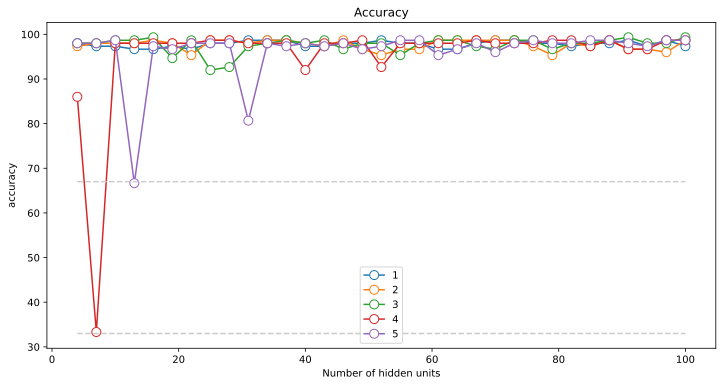

In [34]:
# show accuracy as a function of model depth
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numunits[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

In [47]:
np.max(accuracies)

99.33333587646484

In [45]:
np.argmax(accuracies)

22

In [41]:
accuracies[accuracies = 

array([[98.        , 97.33333588, 98.        , 86.        , 98.        ],
       [97.33333588, 98.        , 98.        , 33.33333588, 98.        ],
       [97.33333588, 98.        , 98.66667175, 98.        , 98.66667175],
       [96.66666412, 98.        , 98.66667175, 98.        , 66.66667175],
       [96.66666412, 98.66667175, 99.33333588, 98.        , 97.33333588],
       [97.33333588, 98.        , 94.66666412, 98.        , 96.66666412],
       [96.66666412, 95.33332825, 98.66667175, 98.        , 98.        ],
       [98.        , 98.66667175, 92.        , 98.66667175, 98.        ],
       [98.        , 98.66667175, 92.66666412, 98.66667175, 98.        ],
       [98.66667175, 98.        , 97.33333588, 98.        , 80.66666412],
       [98.66667175, 98.66667175, 98.        , 98.        , 98.        ],
       [98.66667175, 98.66667175, 98.66667175, 98.        , 97.33333588],
       [97.33333588, 98.        , 98.        , 92.        , 98.        ],
       [97.33333588, 97.33333588, 98.6

In [50]:
numunits

array([  4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,  40,
        43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,
        82,  85,  88,  91,  94,  97, 100])

In [56]:
numlayers

range(1, 6)